In [156]:
import numpy as np
import matplotlib.pyplot as plt

In [157]:
class MultiArmedBandit:
    def __init__(self):
        self.arms = 5

        self.gaussian_mean = 2
        self.gaussian_variance = 1

        self.coin_win = 5
        self.coin_loss = -6

        self.poisson_mean = 2

        self.exponential_mean = 3

    def pull_arm(self, arm):
        if arm == 0:
            return np.random.normal(self.gaussian_mean, np.sqrt(self.gaussian_variance))
        elif arm == 1:
            return np.random.choice([self.coin_win, self.coin_loss])
        elif arm == 2:
            return np.random.poisson(self.poisson_mean)
        elif arm == 3:
            return np.random.exponential(self.exponential_mean)
        elif arm == 4:
            random_arm = np.random.choice([0, 1, 2, 3])
            return self.pull_arm(random_arm)

class EpsilonGreedy:
    def __init__(self, bandit, epsilon):
        self.bandit = bandit
        self.epsilon = epsilon
        self.arm_counts = np.zeros(bandit.arms)  # Number of times each arm was pulled
        self.arm_rewards = np.zeros(bandit.arms)  # Sum of rewards for each arm

    def run_episode(self, steps):
        total_reward = 0
        for _ in range(steps):
            if np.random.rand() < self.epsilon:
                chosen_arm = np.random.randint(self.bandit.arms)  # Exploration
            else:
                chosen_arm = np.argmax(self.arm_rewards / (self.arm_counts + 1e-5))  # Exploitation
            reward = self.bandit.pull_arm(chosen_arm)
            total_reward += reward
            self.arm_counts[chosen_arm] += 1
            self.arm_rewards[chosen_arm] += reward
        return total_reward

In [158]:
bandit = MultiArmedBandit()
epsilon_values = [0.1, 0.01, 0.001]
episodes = 1000
episode_length = 100

results = {epsilon: [] for epsilon in epsilon_values}
for epsilon in epsilon_values:
    total_reward = 0
    for episode in range(episodes):
        agent = EpsilonGreedy(bandit, epsilon)
        reward = agent.run_episode(episode_length)
        total_reward += reward
        avg_reward = total_reward/(episode+1)
        results[epsilon].append(avg_reward)

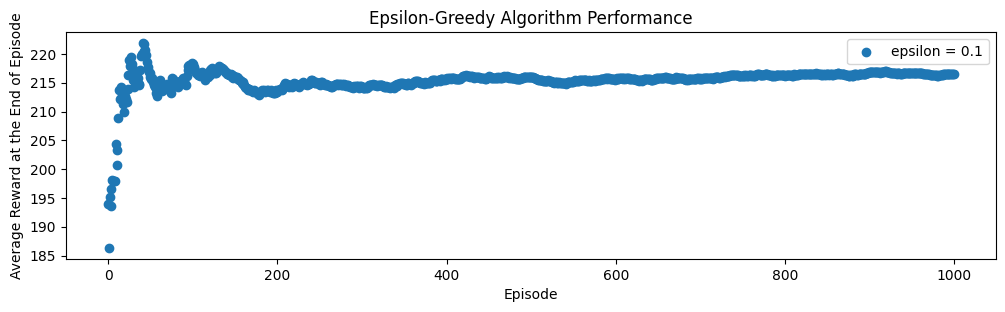

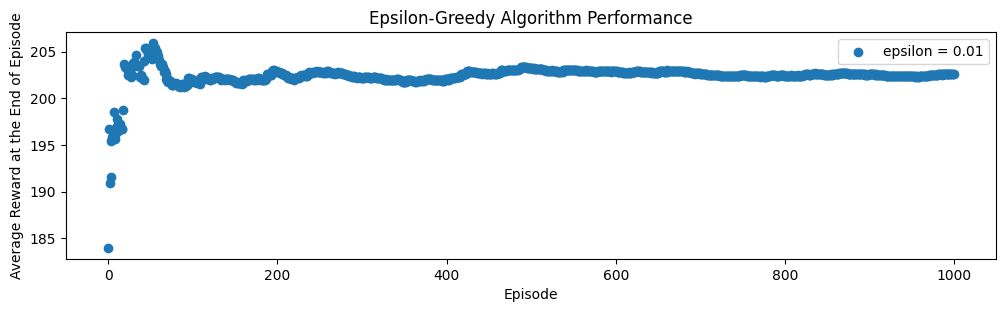

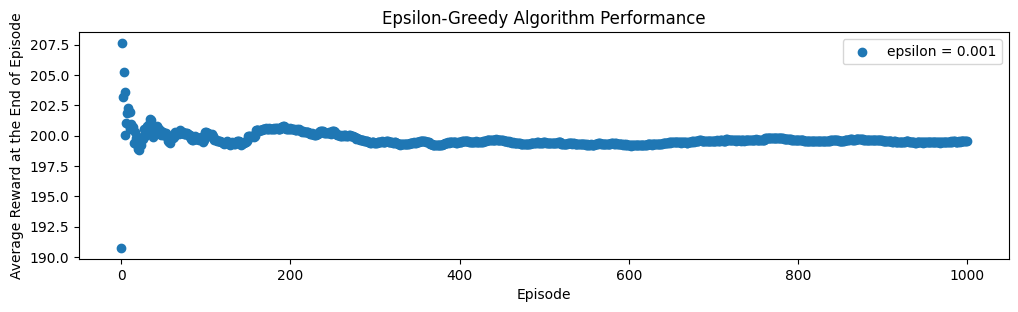

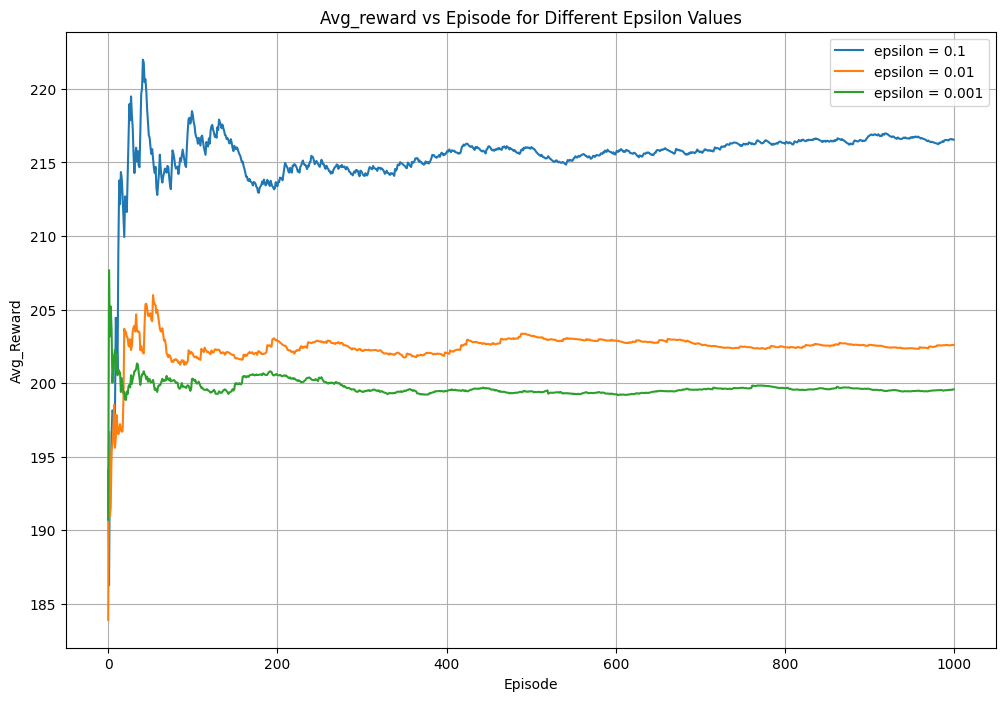

In [159]:
# Plotting the results
i = 1
for epsilon in epsilon_values:
    plt.figure(figsize=(12, 10))
    plt.subplot(3,1,i)
    i += 1
    plt.scatter(range(episodes), results[epsilon], label=f"epsilon = {epsilon}")
    plt.xlabel("Episode")
    plt.ylabel("Average Reward at the End of Episode")
    plt.title("Epsilon-Greedy Algorithm Performance")
    plt.legend()
    plt.show()

plt.figure(figsize=(12, 8))
for epsilon in epsilon_values:
    plt.plot(results[epsilon], label=f'epsilon = {epsilon}')
plt.xlabel('Episode')
plt.ylabel('Avg_Reward')
plt.title('Avg_reward vs Episode for Different Epsilon Values')
plt.legend()
plt.grid(True)
plt.show()